In [29]:
## Train a decision tree to predict the species of a penguin based on their characteristics.
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [31]:
## Split the penguin dataset into a train (70%) and test (30%) set.
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [33]:
## Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature 
## variables and you are also free to choose the max_depth of the tree. Note: Some machine learning algorithms can not handle 
## missing values.
features= ['bill_length_mm', 'body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=5)

In [34]:
## Use your decision tree model to make predictions for both the train and test set.
## Train set predictions
predictions = dt_classification.predict(penguins_train[features])
predictions

array(['Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gen

In [35]:
## Test set predictions
predictions = dt_classification.predict(penguins_test[features])
predictions

array(['Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap'

In [38]:
## Calculate the accuracy for both the train set predictions and test set predictions.
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

## Is the accurracy different? Did you expect this difference?
## The accurracy is different, I did expect this because the train set has more values then the test set and because the train
## set is trained and fitted with a descision tree classifier. So the trained set knows how to distribute values 
## between categories.

Accuracy on training set 0.9871244635193133
Accuracy on test set 0.92


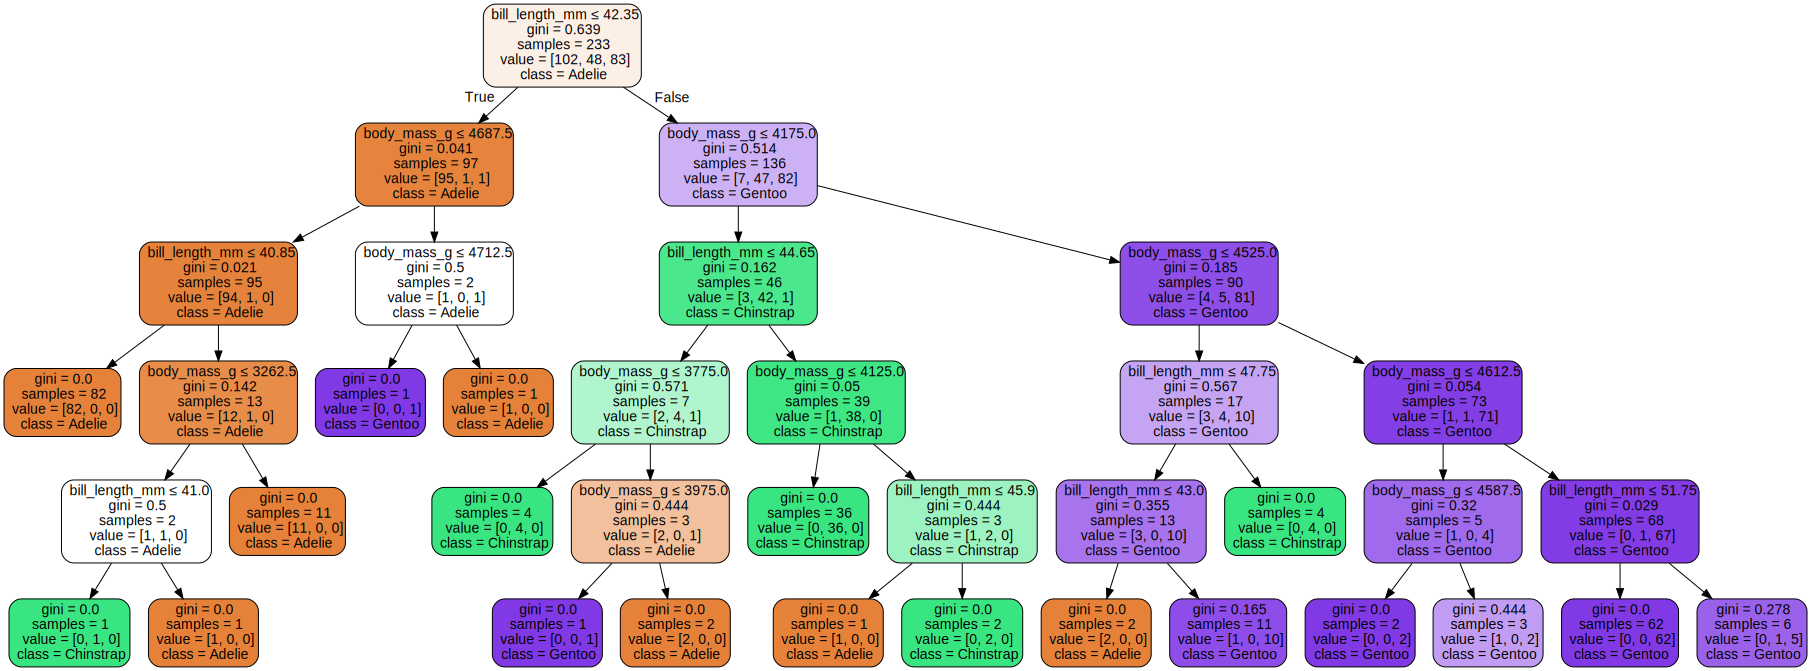

In [36]:
## Use the plot_tree_classification function above to create a plot of the decision tree.
plot_tree_classification(dt_classification, features, np.sort(penguins.species.unique()))

## Take a few minutes to analyse the decision tree.
## Do you understand the tree?
## I do understand the tree. The tree was created by using a dataset and splitting it's values based on one specific feature.
## Once this tree has been created by analysing this dataset predictions can be made to predict new partially unknown data.